## Encoder Decoder Network Experiments

### Cityscapes Dataset

The Cityscapes dataset is a large-scale dataset that provides a diverse set of 30 objects class in an urban street setting from 50 different cities, including different seasons, daytime and weather conditions.

| **Group**    | **Classes**                                                      |
|--------------|------------------------------------------------------------------|
| flat         | road, sidewalk, parking, rail, track                             |
| human        | person, rider                                                    |
| vehicle      | car, truck, bus, on rails, motorcycle, bicycle, caravan, trailer |
| construction | building, wall, fence, guard rail, bridge, tunnel                |
| object       | pole, pole group, traffic sign, traffic light                    |
| nature       | vegetation, terrain                                              |
| sky          | sky                                                              |
| void         | ground, dynamic, static                                   

[Cityscapes](https://www.cityscapes-dataset.#com/)

## Project Specification:
- Perform 2 class segmentation for road and vehicle class (vehicle class contains multiple sub classes, eg. car, truck, caravan, etc.)
- Use model Encoder and Decoder with residual skips with each layer
- Multiscale analysis: multiscale filters
- Lossess: Weighted Cross Entropy (WCE)
- Metrics to use: F1 score
- Analyse the results from different size of filters by training each filter for multiple epoch (minimum 10)
- Select the best filter combination to train the fiset.com/)

## Preprocessing the dataset

The cityscapes dataset comes with images and its annotations separately in different compressed folders. Further each of these folders have their data distrubuted into train, test and validation sets. This section deals with processing the images and its annotations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import os
import cv2

In [2]:
# set paths for project root folder, image and finely annotated image folders for training
path_root = r"C:\Users\Dell\Documents\Assignments\ENEE_6583\Project_1"
path_ant = r"\gtFine\train\aachen" # Annotated images path
path_img = r"\leftImg8bit\train\aachen"

In [3]:
# read an annotated image
img_ant = cv2.imread(path_root + path_ant + r"\aachen_000000_000019_gtFine_labelIds.png")
print("Maximum and minimum values = ", img_ant.max(axis=(0, 1)), img_ant.min(axis=(0, 1)))
print(img_ant.shape, img_ant.max(axis=(0, 1)), img_ant.min(axis=(0, 1)))

Maximum and minimum values =  [33 33 33] [0 0 0]
(1024, 2048, 3) [33 33 33] [0 0 0]


`plt.imread` normalizes the image data from 0 to 1, so we can multiply the image by 255 to get label values in the images

In [4]:
np.unique(img_ant[:, :, 2] == img_ant[:, :, 0])

array([ True])

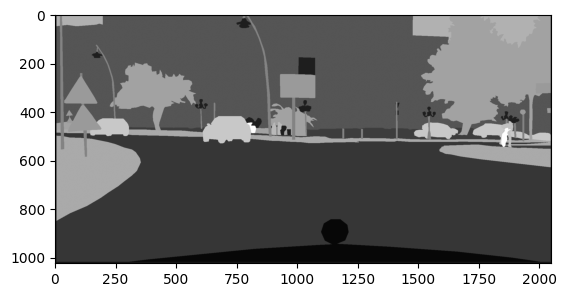

In [5]:
plt.imshow(img_ant/33)

In [6]:
img_plt = plt.imread(path_root + path_ant + r"\aachen_000000_000019_gtFine_labelIds.png") * 255
img_plt.shape, np.unique(img_plt), np.max(img_plt)

((1024, 2048),
 array([ 0.,  1.,  3.,  4.,  7.,  8., 11., 17., 20., 21., 22., 23., 24.,
        25., 26., 33.], dtype=float32),
 33.0)

In [7]:
image = plt.imread(path_root + path_ant + r"\aachen_000000_000019_gtFine_color.png")

In [8]:
image.shape

(1024, 2048, 4)

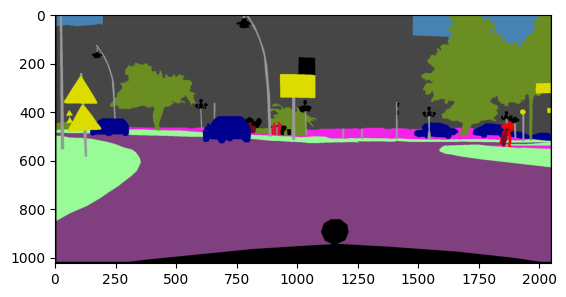

In [9]:
plt.imshow(image)

Image size =  (1024, 2048, 3)
Maximum and minimum values =  [255 255 255] [0 0 0]
Unique values =  [  0 223 230 231 232 233 234 235 236 239 245 248 249 252 253 255]


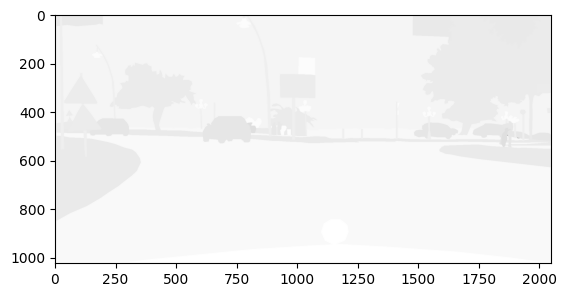

In [10]:
img_ant = img_ant * 255
plt.imshow(img_ant)
# check image specifications
print("Image size = ", img_ant.shape)
print("Maximum and minimum values = ", img_ant.max(axis=(0, 1)), img_ant.min(axis=(0, 1)))
print("Unique values = ", np.unique(img_ant))

In [11]:
img_resized = cv2.resize(img_ant, (256, 256), interpolation=cv2.INTER_NEAREST)

In [12]:
img_resized.shape

(256, 256, 3)

The integer values in the annotated image represent each class in the image

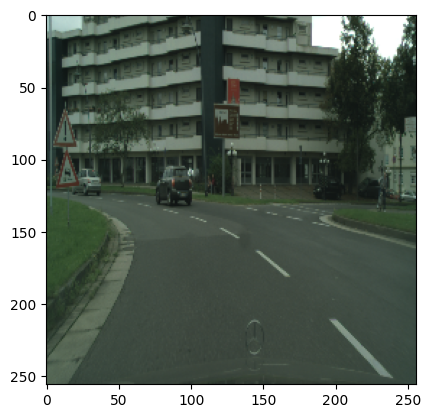

In [13]:
# read an image file and write to numpy file
arr = []
height, width = 256, 256

img = mp.imread(path_root + path_img + r"\aachen_000000_000019_leftImg8bit.png") * 255
img_resized = cv2.resize(img, (height, width))
arr.append(np.asarray(img_resized))
plt.imshow(img_resized / 255)

arr = np.array(arr)
np.save(path_root + r"/processed_data/numpy/" + "dummy_out", arr.astype('uint8'))

In [14]:
np.unique(img_resized)

array([ 14.75,  15.  ,  15.5 ,  15.75,  16.  ,  16.25,  16.5 ,  16.75,
        17.  ,  17.25,  17.5 ,  17.75,  18.  ,  18.25,  18.5 ,  18.75,
        19.  ,  19.25,  19.5 ,  19.75,  20.  ,  20.25,  20.5 ,  20.75,
        21.  ,  21.25,  21.5 ,  21.75,  22.  ,  22.25,  22.5 ,  22.75,
        23.  ,  23.25,  23.5 ,  23.75,  24.  ,  24.25,  24.5 ,  24.75,
        25.  ,  25.25,  25.5 ,  25.75,  26.  ,  26.25,  26.5 ,  26.75,
        27.  ,  27.25,  27.5 ,  27.75,  28.  ,  28.25,  28.5 ,  28.75,
        29.  ,  29.25,  29.5 ,  29.75,  30.  ,  30.25,  30.5 ,  30.75,
        31.  ,  31.25,  31.5 ,  31.75,  32.  ,  32.25,  32.5 ,  32.75,
        33.  ,  33.25,  33.5 ,  33.75,  34.  ,  34.25,  34.5 ,  34.75,
        35.  ,  35.25,  35.5 ,  35.75,  36.  ,  36.25,  36.5 ,  36.75,
        37.  ,  37.25,  37.5 ,  37.75,  38.  ,  38.25,  38.5 ,  38.75,
        39.  ,  39.25,  39.5 ,  39.75,  40.  ,  40.25,  40.5 ,  40.75,
        41.  ,  41.25,  41.5 ,  41.75,  42.  ,  42.25,  42.5 ,  42.75,
      

In [15]:
dummy_data = np.load(path_root + r"/processed_data/numpy/" + "dummy_out.npy")

(1, 256, 256, 3)


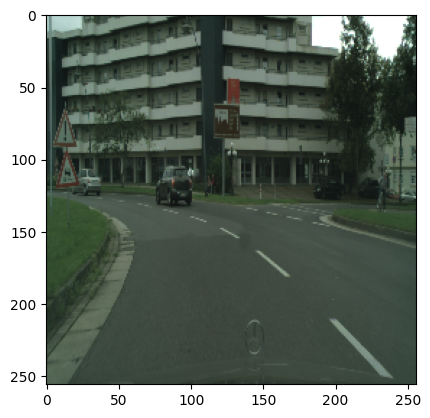

In [16]:
print(dummy_data.shape)
plt.imshow(dummy_data[0])

In [17]:
arr[0].shape

(256, 256, 3)

In [18]:
# image specifications
print("Image size = ", img.shape)
print("Maximum and minimum values = ", img.max(axis=(0, 1)), img.min(axis=(0, 1)))

Image size =  (1024, 2048, 3)
Maximum and minimum values =  [255. 255. 255.] [ 0. 19.  1.]


255.0
Image size after resizing =  (256, 256, 3)


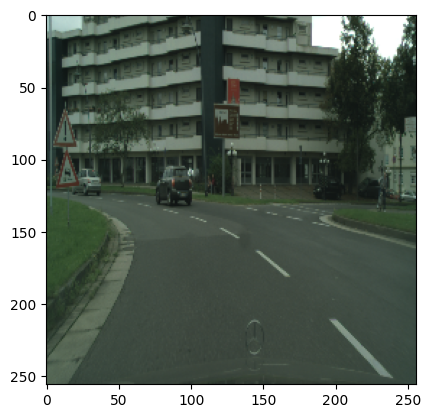

In [19]:
# resize the image to 256 x 256 pixels
img_res = cv2.resize(img, (256, 256))
print(img_res.max())
plt.imshow(img_res / 255)

print("Image size after resizing = ", img_res.shape)

In [20]:
# initialize labels and their ids, only the ones that are needed to be classified are added
label = {
    'ego vehicle': 1,
    'road'       : 7,
    'car'        : 26,
    'truck'      : 27,
    'bus'        : 28,
    'caravan'    : 29,
    'train'      : 31,
    'motorcycle' : 32,
    'bicycle'    : 33
}

In [21]:
# define a function to traverse through the given path and import all the image files and process the images and then return images as numpy array

def read_images(path, output_filename, interpolate):
    """
    Traverses through the path and reads all the .png images and returns images as numpy array

    Parameters: 
    - path (str): path where the images are located
    - output_filename (str): file name for the new numpy data
    - interpolate (boolean): true if interpolation needed during resizing, else false
    
    Returns: 
    - arr (np.array): numpy narray of images 
    """

    # set height and width to resize
    height, width = 256, 256

    img_count = 0
    arr = []

    # if the given path is for labels interpolate while resizing and only get the required labels for classification
    if interpolate:
        for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith('_gtFine_labelIds.png'):
                    image = plt.imread(os.path.join(root, file)) * 255 # scaling with a factor of 255 because the image are normalized
                    # only select the required classes from the label
                    img_processed = (image == label['road']) * 1 + (image == label['ego vehicle']) * 2 + (image == label['car']) * 2 + (image == label['truck']) * 2 + (image == label['bus']) * 2 + (image == label['caravan']) * 2 + (image == label['train']) * 2 + (image == label['motorcycle']) * 2 + (image == label['bicycle']) * 2
                    img_resized = cv2.resize(img_processed, (height, width), interpolation=cv2.INTER_NEAREST) # interpolate for labels
                    arr.append(np.asarray(img_resized))
                    folder_name = os.path.split(root)[-1]
                    print("Processing image labels, folder %s, file number %d"%(folder_name, img_count), '\r', end="", flush=True)
                    img_count += 1
    else:
        for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith('.png'):
                    image = plt.imread(os.path.join(root, file)) * 255
                    img_resized = cv2.resize(image, (height, width))
                    arr.append(np.asarray(img_resized))
                    folder_name = os.path.split(root)[-1]
                    print("Processing images, folder %s, file number %d"%(folder_name, img_count), '\r', end="", flush=True)
                    img_count += 1
    print('\n')
    arr = np.array(arr)

    # Save processed image data as .npy file 
    np.save(path_root + r"/processed_data/numpy/" + output_filename, arr.astype('uint8'))
    return arr

In [ ]:
# convert all images and labels to numpy array
X_train = read_images(path_root + r"\leftImg8bit\train", "train_x", False)
X_val = read_images(path_root + r"\leftImg8bit\val", "val_x", False)
X_test = read_images(path_root + r"\leftImg8bit\test", "test_x", False)
y_train = read_images(path_root + r"\gtFine\train", "train_y", True)
y_val = read_images(path_root + r"\gtFine\val", "val_y", True)
y_test = read_images(path_root + r"\gtFine\test", "test_y", True)

### Load data from file

After preprocessing, the numpy array of image and label files are saved in .npy format. The data has been divided as X_train, y_train, X_test and y_test

In [22]:
# Load data from .npy file
filepath = path_root + r'\processed_data\numpy'

X_train = np.load(filepath + r'\train_x.npy') / 255
X_val = np.load(filepath + r'\val_x.npy') / 255
X_test = np.load(filepath + r'\test_x.npy') / 255 
y_test = np.load(filepath + r'\test_y.npy') * 1.
y_train = np.load(filepath + r'\train_y.npy') * 1.
y_val = np.load(filepath + r'\val_y.npy') * 1.

In [23]:
np.unique(X_val[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02745098, 0.03137255, 0.03529412, 0.03921569,
       0.04313725, 0.04705882, 0.05098039, 0.05490196, 0.05882353,
       0.0627451 , 0.06666667, 0.07058824, 0.0745098 , 0.07843137,
       0.08235294, 0.08627451, 0.09019608, 0.09411765, 0.09803922,
       0.10196078, 0.10588235, 0.10980392, 0.11372549, 0.11764706,
       0.12156863, 0.1254902 , 0.12941176, 0.13333333, 0.1372549 ,
       0.14117647, 0.14509804, 0.14901961, 0.15294118, 0.15686275,
       0.16078431, 0.16470588, 0.16862745, 0.17254902, 0.17647059,
       0.18039216, 0.18431373, 0.18823529, 0.19215686, 0.19607843,
       0.2       , 0.20392157, 0.20784314, 0.21176471, 0.21568627,
       0.21960784, 0.22352941, 0.22745098, 0.23137255, 0.23529412,
       0.23921569, 0.24313725, 0.24705882, 0.25098039, 0.25490196,
       0.25882353, 0.2627451 , 0.26666667, 0.27058824, 0.2745098 ,
       0.27843137, 0.28235294, 0.28627451, 0.29019608, 0.29411

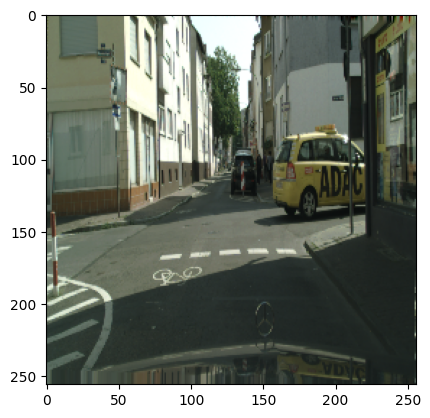

In [24]:
plt.imshow(X_val[0])

In [25]:
np.unique(y_train[0])

array([0., 1., 2.])

In [26]:
# Check the dataset size
print("Training data size = ", X_train.shape)
print("Validation data size = ", X_val.shape)

Training data size =  (2975, 256, 256, 3)
Validation data size =  (500, 256, 256, 3)


The training dataset has 2975 images of shape = 256, 256, 3 (number of channels = 3)\
The validation dataset has 500 images of shape = 256, 256, 3

In [27]:
y_val.shape

(500, 256, 256)

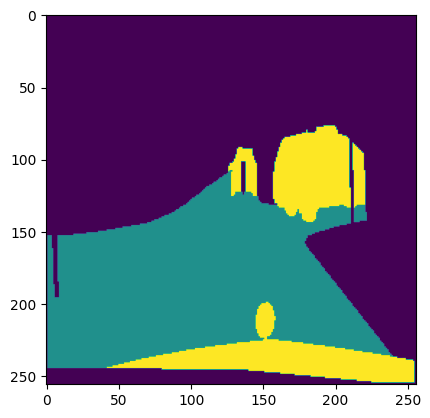

In [28]:
plt.imshow(y_val[0]/3)

In [29]:
np.unique(y_val[0])

array([0., 1., 2.])

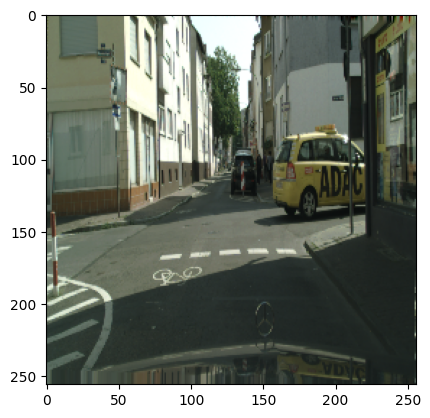

In [30]:
plt.imshow(X_val[0])

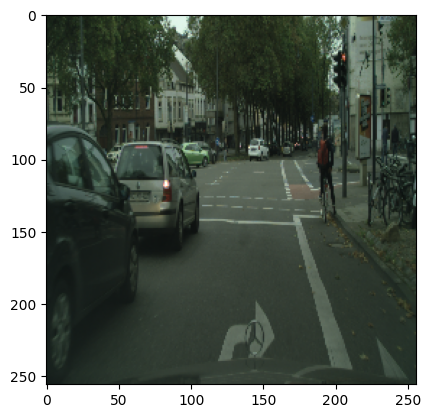

In [31]:
# Display an image
plt.imshow(X_train[10])

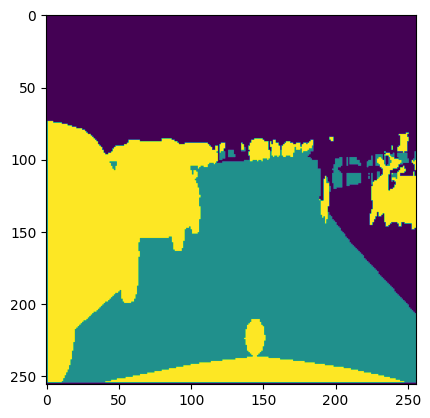

In [32]:
plt.imshow(y_train[10]/3)

In [33]:
y_train[10, :, :].shape

(256, 256)

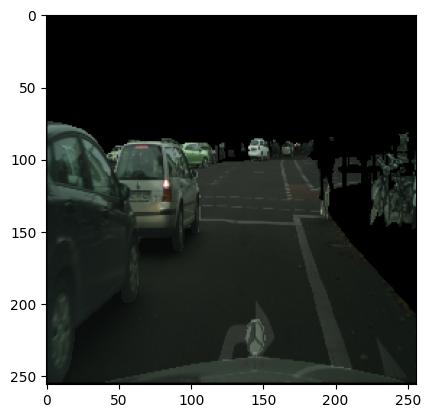

In [34]:
# Display an image with only the labels required for classification
img_ovrlayed = X_train[10] * (y_train[10, :, :, np.newaxis])
plt.imshow(img_ovrlayed/ np.max(img_ovrlayed))

In [35]:
print(img_ovrlayed.shape)

(256, 256, 3)


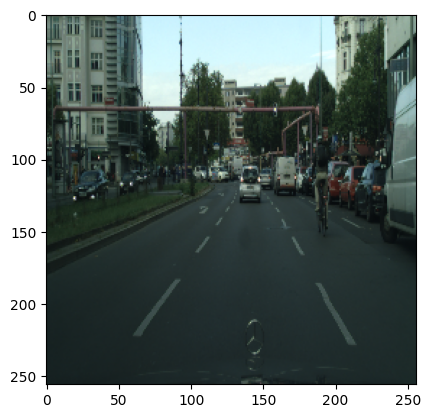

In [36]:
plt.imshow(X_test[10])

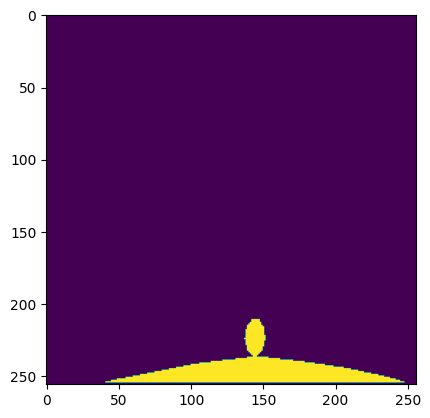

In [37]:
plt.imshow(y_test[10])

### Tensorizing

In [38]:
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
from torchvision.transforms import transforms, Compose, Resize
import torch.nn.functional as F

In [39]:
from PIL import Image

from PIL import Image

class ReadDataset(Dataset):
    def __init__(self, Xnpy, Ynpy, Xtransform=transforms.ToTensor(), Ytransform=transforms.ToTensor()):
        self.Xdata = Xnpy
        self.Ydata = Ynpy
        self.Xtran = Xtransform
        self.Ytran = Ytransform
        
    def __len__(self):
        return len(self.Xdata)
    
    def __getitem__(self, idx):
        X = self.Xtran(self.Xdata[idx])
        Y = self.Ytran(self.Ydata[idx])
        Y = F.one_hot(Y.long(), num_classes=3)
        # change the channel to be in the second axis
        Y = Y.permute(3, 1, 2, 0).squeeze()
        return X,Y
        

In [40]:
Yresize = 16
import PIL
# Ytrans transformation
Ytrans = Compose([
    transforms.ToTensor(),
    Resize((Yresize, Yresize), interpolation=PIL.Image.NEAREST)
])

# Apply Ytrans during dataset creation
trainXY = ReadDataset(X_train[:2048], y_train[:2048])
testXY = ReadDataset(X_test[:512], y_test[:512])
valXY = ReadDataset(X_val[:128], y_val[:128])

In [41]:
xx, yy = next(iter(valXY))

In [42]:
xx.is_cuda

False

In [43]:
xx.shape, yy.shape, xx.min(), yy.min(), xx.max(), yy.max()

(torch.Size([3, 256, 256]),
 torch.Size([3, 256, 256]),
 tensor(0., dtype=torch.float64),
 tensor(0),
 tensor(1., dtype=torch.float64),
 tensor(1))

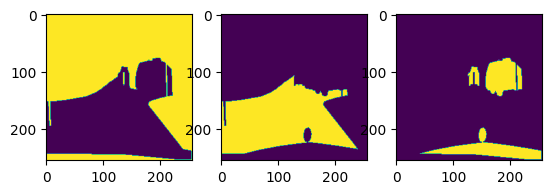

In [44]:
# display 3 channels from Y
fig, axs = plt.subplots(1, 3)
axs[0].imshow(yy[0])
axs[1].imshow(yy[1])
axs[2].imshow(yy[2])

In [45]:
# check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [46]:
# create tensor dataset from numpy array 
# trainXY = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train).to(device))
# valXY = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val).to(device))

In [47]:
# set up dataloader
batch_size = 16

loader_train = DataLoader(trainXY, batch_size)
loader_val = DataLoader(valXY, batch_size)

In [48]:
type(loader_train)

torch.utils.data.dataloader.DataLoader

In [49]:
for batch, (X,Y) in enumerate(loader_train):
    print(batch, X.shape, Y.shape)

0 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
1 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
2 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
3 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
4 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
5 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
6 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
7 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
8 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
9 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
10 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
11 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
12 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
13 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
14 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
15 torch.Size([16, 3, 256, 256]) torch.Size([16, 3, 256, 256])
16

In [50]:
# Checking the size of dataloader
next(iter(loader_train))[1].shape

torch.Size([16, 3, 256, 256])

In [51]:
# Check the type of data
type(trainXY)

__main__.ReadDataset

## Model

In [52]:
import torch.nn as nn
from torch.utils.data.dataset import Dataset
import torch.optim as optim
from torchsummary import summary
from torch.nn import CrossEntropyLoss

### Serial Convolution Block

In [53]:
# Define a class for the serial convolution block. It inherits from the nn.Module class in pytorch.
class SConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, c1_kernel_size= 3, c2_kernel_size= 3):
        super(SConvBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=(c1_kernel_size, c1_kernel_size), 
                               padding=(c1_kernel_size // 2, c1_kernel_size // 2)) # integer division of kernel size to get padding size
        self.relu1 = nn.ReLU()

        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(in_channels=out_channels, out_channels= out_channels, kernel_size=(c2_kernel_size, c2_kernel_size), 
                               padding=(c2_kernel_size // 2, c2_kernel_size // 2))
        self.relu2 = nn.ReLU()

    def forward(self, X):
        conv1 = self.relu1(self.conv1(self.bn1(X))).to(device)
        conv2 = self.relu2(self.conv2(self.bn2(conv1))).to(device)

        return conv2
    

In [54]:
conv_model = SConvBlock(in_channels = 3, out_channels = 32, c1_kernel_size = 3, c2_kernel_size = 3)

summary(conv_model, (3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
├─BatchNorm2d: 1-1                       [-1, 3, 256, 256]         6
├─Conv2d: 1-2                            [-1, 32, 256, 256]        896
├─ReLU: 1-3                              [-1, 32, 256, 256]        --
├─BatchNorm2d: 1-4                       [-1, 32, 256, 256]        64
├─Conv2d: 1-5                            [-1, 32, 256, 256]        9,248
├─ReLU: 1-6                              [-1, 32, 256, 256]        --
Total params: 10,214
Trainable params: 10,214
Non-trainable params: 0
Total mult-adds (M): 660.60
Input size (MB): 0.75
Forward/backward pass size (MB): 49.50
Params size (MB): 0.04
Estimated Total Size (MB): 50.29


Layer (type:depth-idx)                   Output Shape              Param #
├─BatchNorm2d: 1-1                       [-1, 3, 256, 256]         6
├─Conv2d: 1-2                            [-1, 32, 256, 256]        896
├─ReLU: 1-3                              [-1, 32, 256, 256]        --
├─BatchNorm2d: 1-4                       [-1, 32, 256, 256]        64
├─Conv2d: 1-5                            [-1, 32, 256, 256]        9,248
├─ReLU: 1-6                              [-1, 32, 256, 256]        --
Total params: 10,214
Trainable params: 10,214
Non-trainable params: 0
Total mult-adds (M): 660.60
Input size (MB): 0.75
Forward/backward pass size (MB): 49.50
Params size (MB): 0.04
Estimated Total Size (MB): 50.29

In [55]:
class convblock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(convblock,self).__init__()
        self.bn1   = nn.BatchNorm2d(in_channels).to(device)
        self.conv1 = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=(3,3),padding=(1,1)).to(device)       
        self.relu1 = nn.ReLU().to(device)
        
        self.bn2   = nn.BatchNorm2d(out_channels).to(device)
        self.conv2 = nn.Conv2d(in_channels=out_channels,out_channels=out_channels,kernel_size=(3,3),padding=(1,1)).to(device)       
        self.relu2 = nn.ReLU().to(device)

    def forward(self, x):
        
        conv1 = self.relu1(self.conv1(self.bn1(x).to(device)).to(device)).to(device)
        conv2 = self.relu2(self.conv2(self.bn2(conv1).to(device)).to(device)).to(device)
        
        return conv2

In [56]:
model = convblock(3, 32)
summary(model, (3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
├─BatchNorm2d: 1-1                       [-1, 3, 256, 256]         6
├─Conv2d: 1-2                            [-1, 32, 256, 256]        896
├─ReLU: 1-3                              [-1, 32, 256, 256]        --
├─BatchNorm2d: 1-4                       [-1, 32, 256, 256]        64
├─Conv2d: 1-5                            [-1, 32, 256, 256]        9,248
├─ReLU: 1-6                              [-1, 32, 256, 256]        --
Total params: 10,214
Trainable params: 10,214
Non-trainable params: 0
Total mult-adds (M): 660.60
Input size (MB): 0.75
Forward/backward pass size (MB): 49.50
Params size (MB): 0.04
Estimated Total Size (MB): 50.29


Layer (type:depth-idx)                   Output Shape              Param #
├─BatchNorm2d: 1-1                       [-1, 3, 256, 256]         6
├─Conv2d: 1-2                            [-1, 32, 256, 256]        896
├─ReLU: 1-3                              [-1, 32, 256, 256]        --
├─BatchNorm2d: 1-4                       [-1, 32, 256, 256]        64
├─Conv2d: 1-5                            [-1, 32, 256, 256]        9,248
├─ReLU: 1-6                              [-1, 32, 256, 256]        --
Total params: 10,214
Trainable params: 10,214
Non-trainable params: 0
Total mult-adds (M): 660.60
Input size (MB): 0.75
Forward/backward pass size (MB): 49.50
Params size (MB): 0.04
Estimated Total Size (MB): 50.29

In [57]:
next(model.parameters()).is_cuda

True

### Encoder with Skips

In [58]:
class EncoderSkips(nn.Module):
    def __init__(self, init_filters=32, c1_kernel_size=3, c2_kernel_size=3):
        super(EncoderSkips, self).__init__()
        self.convblock1 = SConvBlock(in_channels=3, out_channels=init_filters, 
                                     c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

        self.convblock2 = SConvBlock(in_channels=init_filters, out_channels=init_filters*2, 
                                     c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

        self.convblock3 = SConvBlock(in_channels=init_filters*2, out_channels=init_filters*4, 
                                     c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

        self.convblock4 = SConvBlock(in_channels=init_filters*4, out_channels=init_filters*8, 
                                     c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)
        self.maxpool4 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

    def forward(self, X):

        skip1 = self.convblock1(X).to(device)
        skip2 = self.convblock2(self.maxpool1(skip1)).to(device)
        skip3 = self.convblock3(self.maxpool2(skip2)).to(device)
        skip4 = self.convblock4(self.maxpool3(skip3)).to(device)
        out   = self.maxpool4(skip4).to(device)

        return out, skip4, skip3, skip2, skip1
    

In [59]:
model = EncoderSkips(32, 3, 5)
summary(model, (3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
├─SConvBlock: 1-1                        [-1, 32, 256, 256]        --
|    └─BatchNorm2d: 2-1                  [-1, 3, 256, 256]         6
|    └─Conv2d: 2-2                       [-1, 32, 256, 256]        896
|    └─ReLU: 2-3                         [-1, 32, 256, 256]        --
|    └─BatchNorm2d: 2-4                  [-1, 32, 256, 256]        64
|    └─Conv2d: 2-5                       [-1, 32, 256, 256]        25,632
|    └─ReLU: 2-6                         [-1, 32, 256, 256]        --
├─MaxPool2d: 1-2                         [-1, 32, 128, 128]        --
├─SConvBlock: 1-3                        [-1, 64, 128, 128]        --
|    └─BatchNorm2d: 2-7                  [-1, 32, 128, 128]        64
|    └─Conv2d: 2-8                       [-1, 64, 128, 128]        18,496
|    └─ReLU: 2-9                         [-1, 64, 128, 128]        --
|    └─BatchNorm2d: 2-10                 [-1, 64, 128, 128]        128
|    └

Layer (type:depth-idx)                   Output Shape              Param #
├─SConvBlock: 1-1                        [-1, 32, 256, 256]        --
|    └─BatchNorm2d: 2-1                  [-1, 3, 256, 256]         6
|    └─Conv2d: 2-2                       [-1, 32, 256, 256]        896
|    └─ReLU: 2-3                         [-1, 32, 256, 256]        --
|    └─BatchNorm2d: 2-4                  [-1, 32, 256, 256]        64
|    └─Conv2d: 2-5                       [-1, 32, 256, 256]        25,632
|    └─ReLU: 2-6                         [-1, 32, 256, 256]        --
├─MaxPool2d: 1-2                         [-1, 32, 128, 128]        --
├─SConvBlock: 1-3                        [-1, 64, 128, 128]        --
|    └─BatchNorm2d: 2-7                  [-1, 32, 128, 128]        64
|    └─Conv2d: 2-8                       [-1, 64, 128, 128]        18,496
|    └─ReLU: 2-9                         [-1, 64, 128, 128]        --
|    └─BatchNorm2d: 2-10                 [-1, 64, 128, 128]        128
|    └

### Decoder with Skips

In [60]:
class DecoderSkips(nn.Module):
    def __init__(self, init_filters=256, c1_kernel_size=3, c2_kernel_size=3):
        super(DecoderSkips, self).__init__()

        self.upsamp1  = nn.ConvTranspose2d(in_channels=init_filters, out_channels=init_filters, kernel_size=(2,2), stride=2)
        out_chans1    = int(init_filters/2)
        self.convblk1 = SConvBlock(in_channels=init_filters*2, out_channels=out_chans1,
                                  c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)

        self.upsamp2  = nn.ConvTranspose2d(in_channels=out_chans1, out_channels=out_chans1, kernel_size=(2,2), stride=2)
        out_chans2    = int(init_filters/4)
        self.convblk2 = SConvBlock(in_channels=out_chans1*2, out_channels=out_chans2,
                                  c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)

        self.upsamp3  = nn.ConvTranspose2d(in_channels=out_chans2, out_channels=out_chans2, kernel_size=(2,2), stride=2)
        out_chans3    = int(init_filters/8)
        self.convblk3 = SConvBlock(in_channels=out_chans2*2, out_channels=out_chans3,
                                  c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)

        self.upsamp4  = nn.ConvTranspose2d(in_channels=out_chans3, out_channels=out_chans3, kernel_size=(2,2), stride=2)
        self.convblk4 = SConvBlock(in_channels=out_chans3*2, out_channels=out_chans3,
                                  c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)

    def forward(self, X, skip4, skip3, skip2, skip1):

        D4 = self.convblk1(torch.concat([self.upsamp1(X),  skip4], axis=1)).to(device)
        D3 = self.convblk2(torch.concat([self.upsamp2(D4), skip3], axis=1)).to(device)
        D2 = self.convblk3(torch.concat([self.upsamp3(D3), skip2], axis=1)).to(device)
        D1 = self.convblk4(torch.concat([self.upsamp4(D2), skip1], axis=1)).to(device)

        return D1

In [61]:
dec_model = DecoderSkips(c1_kernel_size=5, c2_kernel_size=5)
summary(dec_model, ((256, 16, 16), (256, 32, 32), (128, 64, 64), (64, 128, 128), (32, 256, 256)))

Layer (type:depth-idx)                   Output Shape              Param #
├─ConvTranspose2d: 1-1                   [-1, 256, 32, 32]         262,400
├─SConvBlock: 1-2                        [-1, 128, 32, 32]         --
|    └─BatchNorm2d: 2-1                  [-1, 512, 32, 32]         1,024
|    └─Conv2d: 2-2                       [-1, 128, 32, 32]         1,638,528
|    └─ReLU: 2-3                         [-1, 128, 32, 32]         --
|    └─BatchNorm2d: 2-4                  [-1, 128, 32, 32]         256
|    └─Conv2d: 2-5                       [-1, 128, 32, 32]         409,728
|    └─ReLU: 2-6                         [-1, 128, 32, 32]         --
├─ConvTranspose2d: 1-3                   [-1, 128, 64, 64]         65,664
├─SConvBlock: 1-4                        [-1, 64, 64, 64]          --
|    └─BatchNorm2d: 2-7                  [-1, 256, 64, 64]         512
|    └─Conv2d: 2-8                       [-1, 64, 64, 64]          409,664
|    └─ReLU: 2-9                         [-1, 64, 64, 

Layer (type:depth-idx)                   Output Shape              Param #
├─ConvTranspose2d: 1-1                   [-1, 256, 32, 32]         262,400
├─SConvBlock: 1-2                        [-1, 128, 32, 32]         --
|    └─BatchNorm2d: 2-1                  [-1, 512, 32, 32]         1,024
|    └─Conv2d: 2-2                       [-1, 128, 32, 32]         1,638,528
|    └─ReLU: 2-3                         [-1, 128, 32, 32]         --
|    └─BatchNorm2d: 2-4                  [-1, 128, 32, 32]         256
|    └─Conv2d: 2-5                       [-1, 128, 32, 32]         409,728
|    └─ReLU: 2-6                         [-1, 128, 32, 32]         --
├─ConvTranspose2d: 1-3                   [-1, 128, 64, 64]         65,664
├─SConvBlock: 1-4                        [-1, 64, 64, 64]          --
|    └─BatchNorm2d: 2-7                  [-1, 256, 64, 64]         512
|    └─Conv2d: 2-8                       [-1, 64, 64, 64]          409,664
|    └─ReLU: 2-9                         [-1, 64, 64, 

### Encoder + Decoder with skips

In [62]:
class EncDec(nn.Module):
    def __init__(self, c1_kernel_size=3, c2_kernel_size=3):
        super(EncDec, self).__init__()

        self.encoder = EncoderSkips(c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)
        self.bneck   = SConvBlock(in_channels=256, out_channels=256)
        self.decoder = DecoderSkips(c1_kernel_size=c1_kernel_size, c2_kernel_size=c2_kernel_size)
        self.convout = nn.Conv2d(in_channels=32, out_channels=3, kernel_size=(1, 1))
        self.smax    = nn.LogSoftmax(dim=1)

        print(f'c1 kernel: {c1_kernel_size}, c2 kernel: {c2_kernel_size}')
        
    def forward(self, X):
        enc, skip4, skip3, skip2, skip1   = self.encoder(X)
        bneck                             = self.bneck(enc).to(device)
        dec                               = self.decoder(bneck, skip4, skip3, skip2, skip1).to(device)
        out                               = self.smax(self.convout(dec)).to(device)

        return out

In [63]:
enc_dec = EncDec(c1_kernel_size=3, c2_kernel_size=3)
summary(enc_dec, (3, 256, 256))

c1 kernel: 3, c2 kernel: 3
Layer (type:depth-idx)                   Output Shape              Param #
├─EncoderSkips: 1-1                      [-1, 256, 16, 16]         --
|    └─SConvBlock: 2-1                   [-1, 32, 256, 256]        --
|    |    └─BatchNorm2d: 3-1             [-1, 3, 256, 256]         6
|    |    └─Conv2d: 3-2                  [-1, 32, 256, 256]        896
|    |    └─ReLU: 3-3                    [-1, 32, 256, 256]        --
|    |    └─BatchNorm2d: 3-4             [-1, 32, 256, 256]        64
|    |    └─Conv2d: 3-5                  [-1, 32, 256, 256]        9,248
|    |    └─ReLU: 3-6                    [-1, 32, 256, 256]        --
|    └─MaxPool2d: 2-2                    [-1, 32, 128, 128]        --
|    └─SConvBlock: 2-3                   [-1, 64, 128, 128]        --
|    |    └─BatchNorm2d: 3-7             [-1, 32, 128, 128]        64
|    |    └─Conv2d: 3-8                  [-1, 64, 128, 128]        18,496
|    |    └─ReLU: 3-9                    [-1, 64, 1

Layer (type:depth-idx)                   Output Shape              Param #
├─EncoderSkips: 1-1                      [-1, 256, 16, 16]         --
|    └─SConvBlock: 2-1                   [-1, 32, 256, 256]        --
|    |    └─BatchNorm2d: 3-1             [-1, 3, 256, 256]         6
|    |    └─Conv2d: 3-2                  [-1, 32, 256, 256]        896
|    |    └─ReLU: 3-3                    [-1, 32, 256, 256]        --
|    |    └─BatchNorm2d: 3-4             [-1, 32, 256, 256]        64
|    |    └─Conv2d: 3-5                  [-1, 32, 256, 256]        9,248
|    |    └─ReLU: 3-6                    [-1, 32, 256, 256]        --
|    └─MaxPool2d: 2-2                    [-1, 32, 128, 128]        --
|    └─SConvBlock: 2-3                   [-1, 64, 128, 128]        --
|    |    └─BatchNorm2d: 3-7             [-1, 32, 128, 128]        64
|    |    └─Conv2d: 3-8                  [-1, 64, 128, 128]        18,496
|    |    └─ReLU: 3-9                    [-1, 64, 128, 128]        --
|    |  

In [64]:
def IoU_1hot(pred,label):
    pred = pred.round()
    # print(f'pred: {pred}')
    # print(f'label: {label}')
    
    pred = pred.type(torch.int64)
    label = label.type(torch.int64)

    # print(f'pred.size(): {pred.size()}')
    # print(f'label.size(): {label.size()}')
    
    intersection = (pred*label).sum()
    union = (pred | label).sum()
    return intersection/union

def F1_1hot(pred,label):
    pred = pred.round()
    TP = (((label==1) & (pred==1))*1).sum()
    FP = (((label==0) & (pred==1))*1).sum()
#     TN = (((label==0) & (pred==0))*1).sum()
    FN = (((label==1) & (pred==0))*1).sum()

    return 2*TP/(2* TP + FN + FP)

In [65]:
def WBCE_1hot(pred,label,img_sz=256):
    
    w = torch.nan_to_num(img_sz*img_sz/label.sum(axis=(2,3)),posinf=0)  
    w = w/(w.sum(axis=-1)).reshape(-1,1)
   
    print(f"pred.shape: {pred.shape}")
    print(f"label.shape: {label.shape}")
    print(f"w.shape: {w.shape}")

    loss = torch.nan_to_num(-torch.log(pred)*label * w, posinf = 0)
    return loss

In [66]:
def weights(labels, img_size=256):
    w = torch.nan_to_num(img_size*img_size/labels.sum(axis=(-2,-1)), posinf=0) 
    w = w/w.sum()
    w = w.mean(dim=0).to(device)
    
    return w

In [67]:
lab = torch.randint(low=0, high=2, size=(16, 3, 256, 256))
w = weights(lab)
print(w)

tensor([0.0208, 0.0208, 0.0208], device='cuda:0')


In [68]:
def train(dataloader, model, loss_fn, optimizer, metric):
    size = len(dataloader.dataset)
    loss_T   = 0
    model.train()
    for batch, (X, Y) in enumerate(dataloader):
        # print(f'batch: {batch}, X.shape: {X.shape}, y.shape: {Y.shape}')
        X = X.float().to(device)
        Y = Y.float().to(device)
        # Y = torch.argmax(Y, dim=1).to(device)
        # print(f'X.is_cuda: {X.is_cuda}')
        # print(f'Y.is_cuda: {Y.is_cuda}')
        # print(f'train model.is_cuda: {next(model.parameters()).is_cuda}')
        Yhat = model(X)
        # print(f'torch.max(Y):{torch.max(Y)}')
        # print(f'torch.max(Yhat):{torch.max(Yhat)}')
        
        # print(f'Y_predicted:{Yhat.shape}')
        # print(f'Original Y:{Y.shape}')
        loss = loss_fn(Yhat, Y)
        loss_T  += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"batch: {batch:>5d}, loss: {loss_T:>7f}, metric: {metric(Yhat,Y) :>5f} \n", end=' ')
    return loss_T, Yhat

In [69]:
def val_test(dataloader, model, loss_fn, metric):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, metric_T  = 0, 0
    
    
    with torch.no_grad():
        for X, Y in dataloader:
            X = X.float().to(device)
            Y = Y.float().to(device)
            # Y = torch.argmax(Y, dim=1).to(device)
            # print(f'val model.is_cuda: {next(model.parameters()).is_cuda}')
            Yhat = model(X)
            test_loss += loss_fn(Yhat, Y).item()
            metric_T  += metric(Yhat, Y)* len(Y)

    test_loss /= num_batches
    metric_T  /= size
    print(f"\nval loss: {test_loss:>7f}, metric: { metric_T:>5f}")

In [76]:
# enc_dec = EncDec()
# enc_dec.to(device)
# loss      = CrossEntropyLoss()
# metric    = F1_1hot
# optimizer = optim.Adam(enc_dec.parameters(), lr=0.0001)
# epocs = 3

# # print(next(enc_dec.parameters()).is_cuda)

# for t in range(epocs):
#     print(f"Epoch {t}\n")
#     train(loader_train, enc_dec, loss, optimizer, metric)
#     val_test(loader_val, enc_dec, loss, metric)
# print("Done Training!")

### Train model with different filter sizes

In [77]:
# change filter size for conv1 and conv2 block

filters = [(3, 3), (3, 5), (5, 3), (5, 5)]
loss      = CrossEntropyLoss()
metric    = F1_1hot


for filter_comb in filters:
    c1_filter_size, c2_filter_size = filter_comb
    enc_dec = EncDec(c1_kernel_size=c1_filter_size, c2_kernel_size=c2_filter_size)
    enc_dec.to(device)
    optimizer = optim.Adam(enc_dec.parameters(), lr=0.0001)
    
    num_epocs = 10
    
    for t in range(num_epocs):
        print(f"Epoch {t}\n")
        loss_t, Y_hat = train(loader_train, enc_dec, loss, optimizer, metric)
        val_test(loader_val, enc_dec, loss, metric)
    print("Done Training! \n")

c1 kernel: 3, c2 kernel: 3
Epoch 0

batch:     0, loss: 1.035528, metric: 0.000000 
 batch:     1, loss: 2.060884, metric: 0.000000 
 batch:     2, loss: 3.054132, metric: 0.000000 
 batch:     3, loss: 4.012473, metric: 0.000000 
 batch:     4, loss: 4.958504, metric: 0.000000 
 batch:     5, loss: 5.909861, metric: 0.000000 
 batch:     6, loss: 6.842692, metric: 0.000000 
 batch:     7, loss: 7.757726, metric: 0.000000 
 batch:     8, loss: 8.662120, metric: 0.000000 
 batch:     9, loss: 9.510285, metric: 0.000000 
 batch:    10, loss: 10.397003, metric: 0.000000 
 batch:    11, loss: 11.282870, metric: 0.000000 
 batch:    12, loss: 12.138583, metric: 0.000000 
 batch:    13, loss: 13.059224, metric: 0.000000 
 batch:    14, loss: 13.898694, metric: 0.000000 
 batch:    15, loss: 14.725385, metric: 0.000000 
 batch:    16, loss: 15.520546, metric: 0.000000 
 batch:    17, loss: 16.349813, metric: 0.000000 
 batch:    18, loss: 17.178720, metric: 0.000000 
 batch:    19, loss: 17.9

The combination of (3, 3) for c1_kernel_size and (5, 5) for c2_kernel_size was found to produce least validation loss of 0.206376

In [104]:
out = Y_hat[0].detach().cpu().numpy()
out.shape

(3, 256, 256)

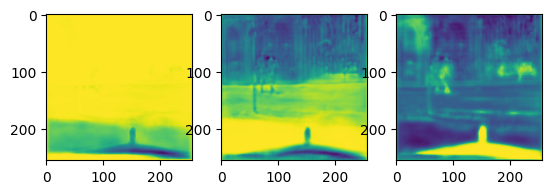

In [105]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out[0])
axs[1].imshow(out[1])
axs[2].imshow(out[2])